<a href="https://colab.research.google.com/github/efreeddo/COVID-19/blob/master/Data%20Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [16]:
from google.colab import files
uploaded = files.upload()

Saving covid19.csv to covid19 (2).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['covid19.csv']))

**Exploring Infection and Death Rates in Hubei**

China, specifically the region of Hubei (which contains Wuhan), was the first area to get badly hit by the coronavirus, and is unique in China as an area that did not practice any form of social distancing for at least a couple months. 

As the region of the world with the most data since the beginning of the coronavirus outbreak, we'll start our exploration of the coronavirus by looking into what we can learn from Hubei.

First, though, we're going to create a few functions to help us sort out data.

In [0]:
# a function to get all confirmed cases in a dataframe limited to one area
def get_confirmed_cases(row, df_area):
  columns = []
  for col in df_area:
    if "Confirmed" in col:
      columns.append(col)
  return df.loc[[row], columns]

# a function to get all deaths in a dataframe limited to one area
def get_deaths(row, df_area):
  columns = []
  for col in df_area:
    if "Deaths" in col:
      columns.append(col)
  return df.loc[[row], columns]

# method for appropriately renaming columns and transposing data
def transpose(df, col_name, row):
  df.rename(columns={col_name: "03-10"}, inplace=True)
  for col in df:
    new_col = col.replace(("%s_" % col_name), "")
    df.rename(columns={col: new_col}, inplace=True)
  df = df.T
  df.rename(columns={row: col_name}, inplace=True)
  df.sort_values(by=col_name, ascending=True, inplace=True)
  return df

Let's visualize the number of confirmed cases in Hubei over time.

In [19]:
df_hubei_confirmed = get_confirmed_cases(0, df)
df_hubei_confirmed

,Confirmed,Confirmed_03-9,Confirmed_03-8,Confirmed_03-7,Confirmed_03-6,Confirmed_03-5,Confirmed_03-4,Confirmed_03-3,Confirmed_03-2,Confirmed_03-1,Confirmed_02-29,Confirmed_02-28,Confirmed_02-27,Confirmed_02-26,Confirmed_02-25,Confirmed_02-24,Confirmed_02-23,Confirmed_02-22,Confirmed_02-21,Confirmed_02-20,Confirmed_02-19,Confirmed_02-18,Confirmed_02-17,Confirmed_02-16,Confirmed_02-15,Confirmed_02-14,Confirmed_02-13,Confirmed_02-12,Confirmed_02-11,Confirmed_02-10,Confirmed_02-9,Confirmed_02-8,Confirmed_02-7,Confirmed_02-6,Confirmed_02-5,Confirmed_02-4,Confirmed_02-3,Confirmed_02-2,Confirmed_02-1,Confirmed_01-31,Confirmed_01-30,Confirmed_01-29,Confirmed_01-28,Confirmed_01-27,Confirmed_01-26,Confirmed_01-25,Confirmed_01-24,Confirmed_01-23,Confirmed_01-22
0,67760,67743.0,67707.0,67666.0,67592.0,67466.0,67332.0,67217.0,67103.0,66907.0,66337.0,65914.0,65596.0,65187.0,64786.0,64287.0,64084.0,64084.0,62662.0,62442.0,62031.0,61682.0,59989.0,58182.0,56249.0,54406.0,48206.0,33366.0,33366.0,31728.0,29631.0,27100.0,24953.0,22112.0,19665.0,16678.0,13522.0,11177.0,7153.0,5806.0,4903.0,3554.0,3554.0,1423.0,1058.0,761.0,549.0,444.0,444.0


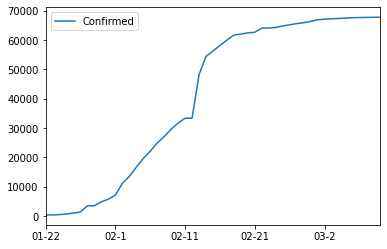

In [20]:
df_hubei_confirmed = transpose(df_hubei_confirmed, "Confirmed", 0)
df_hubei_confirmed.plot()

Now, let's do the same for number of deaths.

In [21]:
df_hubei_deaths = get_deaths(0, df)
df_hubei_deaths

,Deaths,Deaths_03-9,Deaths_03-8,Deaths_03-7,Deaths_03-6,Deaths_03-5,Deaths_03-4,Deaths_03-3,Deaths_03-2,Deaths_03-1,Deaths_02-29,Deaths_02-28,Deaths_02-27,Deaths_02-26,Deaths_02-25,Deaths_02-24,Deaths_02-23,Deaths_02-22,Deaths_02-21,Deaths_02-20,Deaths_02-19,Deaths_02-18,Deaths_02-17,Deaths_02-16,Deaths_02-15,Deaths_02-14,Deaths_02-13,Deaths_02-12,Deaths_02-11,Deaths_02-10,Deaths_02-9,Deaths_02-8,Deaths_02-7,Deaths_02-6,Deaths_02-5,Deaths_02-4,Deaths_02-3,Deaths_02-2,Deaths_02-1,Deaths_01-31,Deaths_01-30,Deaths_01-29,Deaths_01-28,Deaths_01-27,Deaths_01-26,Deaths_01-25,Deaths_01-24,Deaths_01-23,Deaths_01-22
0,3024,3008.0,2986.0,2959.0,2931.0,2902.0,2871.0,2835.0,2803.0,2761.0,2727.0,2682.0,2641.0,2615.0,2563.0,2495.0,2346.0,2346.0,2144.0,2144.0,2029.0,1921.0,1789.0,1696.0,1596.0,1457.0,1310.0,1068.0,1068.0,974.0,871.0,780.0,699.0,618.0,549.0,479.0,414.0,350.0,249.0,204.0,162.0,125.0,125.0,76.0,52.0,40.0,24.0,17.0,17.0


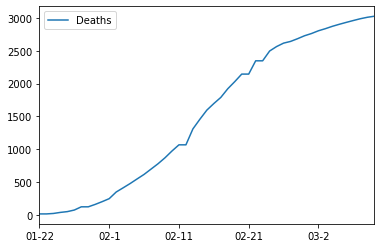

In [22]:
df_hubei_deaths = transpose(df_hubei_deaths, "Deaths", 0)
df_hubei_deaths.plot()

Let's calculate the overall mortality rate over time by dividing the number of deaths over the confirmed cases.

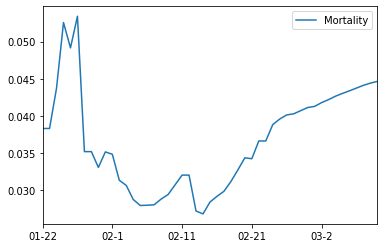

In [23]:
df_hubei_mortality = pd.DataFrame()
df_hubei_mortality["Mortality"] = df_hubei_deaths["Deaths"]/df_hubei_confirmed["Confirmed"]
df_hubei_mortality.plot() # deaths over confirmed cases

This graph is interesting-- it starts off as wildly fluctating before settling towards the 4.5% mortality that has been noted in some articles about coronavirus. This is explained by the much smaller and less reliable amount of data nearer to the beginning of the outbreak.

A trend we can expect to see in most countries is that at the beginning of an outbreak in a region there are relatively few individuals tested and likely proportionally more will be in critical condition. As more tests are performed, the calculated mortality rate will see a steep drop-off before giving us a more accurate predictor. 

**Exploring Infection and Death Rates in Italy**

We're going to explore the coronavirus spread in Italy in the same way we just did with Hubei.

Italy is significant here as a region that didn't do a good job social distancing. We're going to use it as an example later on for what the US could look like if we don't social distance well enough.

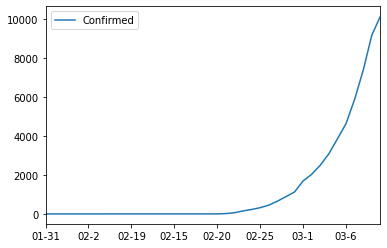

In [28]:
df_italy_confirmed = get_confirmed_cases(1, df)
df_italy_confirmed = transpose(df_italy_confirmed, "Confirmed", 1)
#necessary because cases don't start immediately:
df_italy_confirmed.dropna(inplace=True) 
df_italy_confirmed.plot()

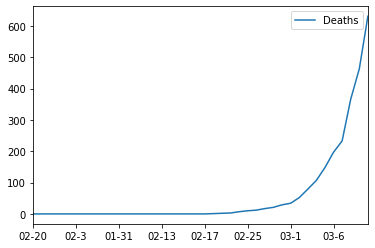

In [29]:
df_italy_deaths = get_deaths(1, df)
df_italy_deaths = transpose(df_italy_deaths, "Deaths", 1)
df_italy_deaths.dropna(inplace=True)
df_italy_deaths.sort_values(by="Deaths", ascending=True, inplace=True)
df_italy_deaths.plot()

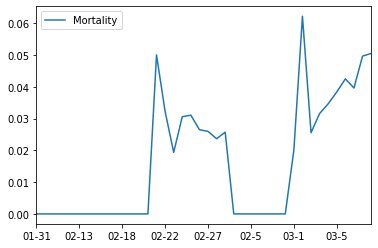

In [30]:
df_italy_mortality = pd.DataFrame()
df_italy_mortality["Mortality"] = df_italy_deaths["Deaths"]/df_italy_confirmed["Confirmed"]
df_italy_mortality.plot() 

**Data Exploration with Singapore**

Singapore is important as a country that has done a good job preparing and making use of social distancing practice. But, because the outbreak only started relatively recently, there actually has been no deaths yet! So, we'll only calculate and visualize the number of confirmed cases, which is what we're most concerned with, anyway.

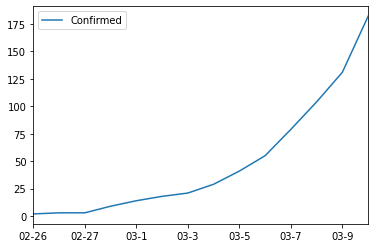

In [27]:
df_singapore_confirmed = get_confirmed_cases(34, df)
df_singapore_confirmed = transpose(df_singapore_confirmed, "Confirmed", 34)
df_singapore_confirmed.dropna(inplace=True)
df_singapore_confirmed.plot()